In [2]:
from google.colab import drive
drive.mount('/content/drive')

#import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#read dataset
df = pd.read_csv('/content/drive/MyDrive/datascience/synthetic_ecommerce_data.csv')
df.head()

Mounted at /content/drive


,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31


In [ ]:
#data understanding
print('\n Data info :')
print(df.info())

#data statistic
print('\n Data description :')
print(df.describe())

#handling data missing
print('\n Data missing :')
print(df.isnull().sum())

#handling data duplicated
print('\n Data duplicated :')
print(df.duplicated().sum())

#convert data to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])



 Data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    100000 non-null  object 
 1   Customer_ID       100000 non-null  object 
 2   Product_ID        100000 non-null  object 
 3   Transaction_Date  100000 non-null  object 
 4   Units_Sold        100000 non-null  int64  
 5   Discount_Applied  100000 non-null  float64
 6   Revenue           100000 non-null  float64
 7   Clicks            100000 non-null  int64  
 8   Impressions       100000 non-null  int64  
 9   Conversion_Rate   100000 non-null  float64
 10  Category          100000 non-null  object 
 11  Region            100000 non-null  object 
 12  Ad_CTR            100000 non-null  float64
 13  Ad_CPC            100000 non-null  float64
 14  Ad_Spend          100000 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 11.4+ 

1. Sales Trend Analysis
Monthly revenue from December 2023 to December 2024 shows fluctuations. Key findings:

Month with the highest revenue: November 2024, with 4.83 million.
Month with the lowest revenue: December 2024, with 0.93 million (likely due to incomplete data for the month).


---


2. Top Product Categories
Based on revenue:

Electronics generated the highest revenue:11.33 million.
Followed by Books (11.19 million) and Toys (11.19 million).
Based on the number of units sold:

Electronics: 3 million units sold, significantly surpassing other categories.
Toys: 2.77 million units.
Clothing: 2.47 million units.


---



# 3. Customer Activity Analysis by Region
Top-performing region:

Asia:

Total revenue: 18.49 million.
Number of transactions: 33,472.
Unique customers: 16,244.
North America and Europe show nearly equal performance, each generating approximately 18.4 million in revenue.

In [ ]:
#analyze top  categories by total revenue
top_categories = df.groupby('Category')[['Revenue']].sum().sort_values(by='Revenue',ascending=False)

#category by unit sold
top_categories_sold = df.groupby('Category')[['Units_Sold']].sum().sort_values(by='Units_Sold',ascending = False)




#analyze customer activity by region
region_analyze = df.groupby('Region').agg({'Customer_ID':'nunique',
                                           'Revenue' : 'sum',
                                           'Transaction_ID' : 'count'}).rename(columns={'Revenue' : 'Total_revenue',
                                                                                        'Customer_id' : 'Customer_count',
                                                                                        'Transaction_ID' : 'Transacntion_count'}).sort_values(by='Total_revenue',ascending = False)


#trend time to revenue
trend_revenue = df.groupby('Transaction_Date')[['Revenue']].sum().sort_values(by = 'Revenue',ascending = False)
trend_revenue1 =df.groupby('Transaction_Date')[['Revenue']].sum()

#new column for month and year for trend analyis
df['Month'] = df['Transaction_Date'].dt.month
df['Year'] = df['Transaction_Date'].dt.year

#group by trend analys
trend_analysis = df.groupby(['Month','Year'])['Revenue'].sum().reset_index()
trend_analysis.rename(columns={'Revenue': 'Monthly_Revenue'}, inplace=True)




print('\n Top  categories by total revenue :')
print(top_categories)

print('\n Top  categories by unit sold:')
print(top_categories_sold)

print('\n Customer activity by region :')
print(region_analyze)

print('\n Trend time to revenue :')
print(trend_revenue)

print('\n Trend analysis :')
print(trend_analysis)


 Top  categories by total revenue :
                     Revenue
Category                    
Electronics      11326820.25
Books            11195311.88
Toys             11194842.46
Clothing         11034899.26
Home Appliances  10559207.22

 Top  categories by unit sold:
                 Units_Sold
Category                   
Electronics         3001900
Toys                2769299
Clothing            2471409
Home Appliances     2370894
Books               2219356

 Customer activity by region :
               Customer_ID  Total_revenue  Transacntion_count
Region                                                       
Asia                 16244    18492871.13               33472
North America        16159    18419228.61               33263
Europe               16146    18398981.33               33265

 Trend time to revenue :
                    Revenue
Transaction_Date           
2024-11-29        448238.39
2024-10-14        188478.33
2024-03-01        181878.39
2024-06-17        181597

<Figure size 1000x800 with 0 Axes>

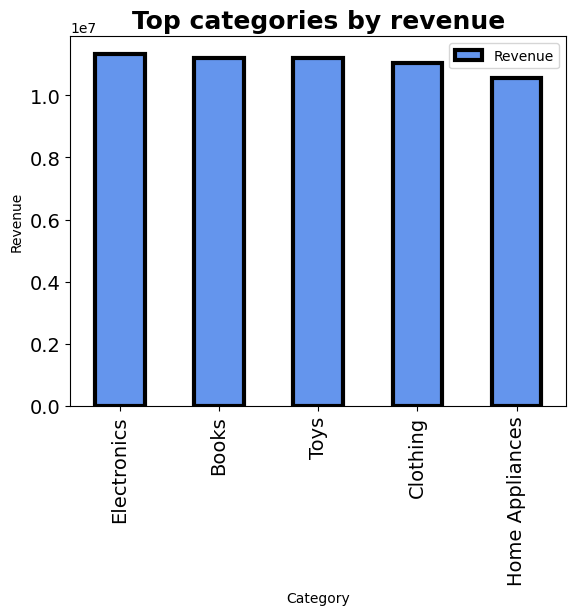

<Figure size 1000x800 with 0 Axes>

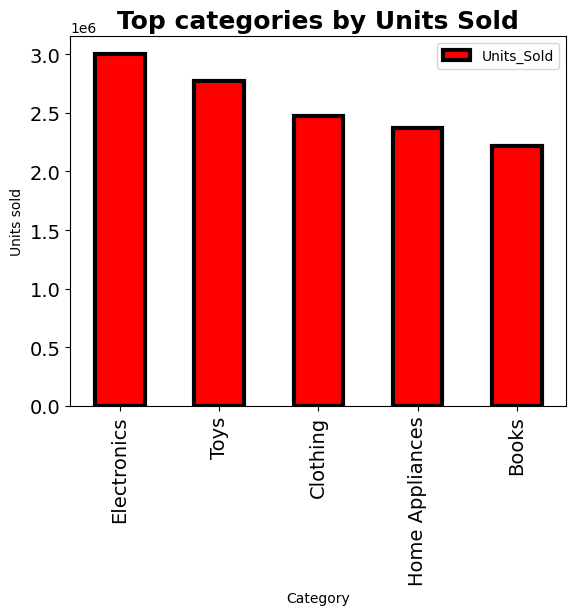

In [ ]:
#TOP categories by total revenue grafik
plt.figure(figsize=(10,8))
top_categories.plot(kind = 'bar',color ='cornflowerblue',edgecolor = 'black',linewidth = 3)
plt.title('Top categories by revenue',fontsize = 18,fontweight = 'bold')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()
plt.show()

#Top categories by units sold
plt.figure(figsize=(10,8))
top_categories_sold.plot(kind = 'bar',color ='red',edgecolor = 'black',linewidth = 3)
plt.title('Top categories by Units Sold',fontsize = 18,fontweight = 'bold')
plt.xlabel('Category')
plt.ylabel('Units sold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()
plt.show()





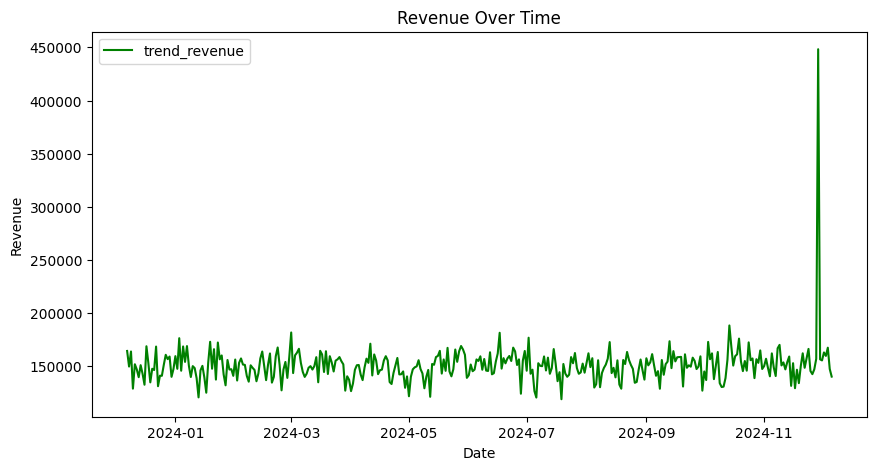

In [ ]:
#trend to time
plt.figure(figsize=(10, 5))
plt.plot(trend_revenue1, label='trend_revenue',color = 'green')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

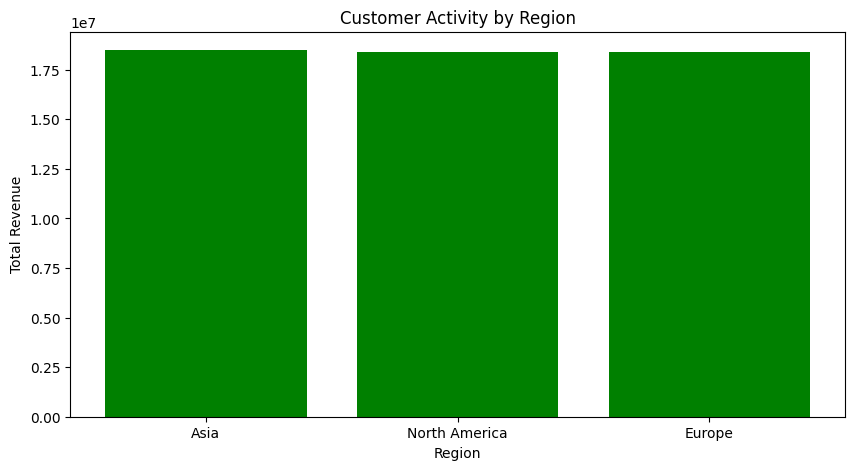

In [ ]:
#Customer activity by region
plt.figure(figsize=(10,5))
plt.bar(region_analyze.index,region_analyze['Total_revenue'],color = 'green')
plt.title('Customer Activity by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

#effectivitas ads for Revenue

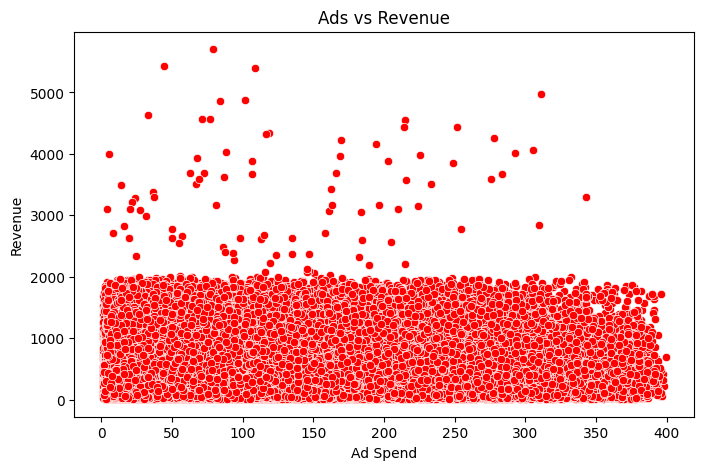

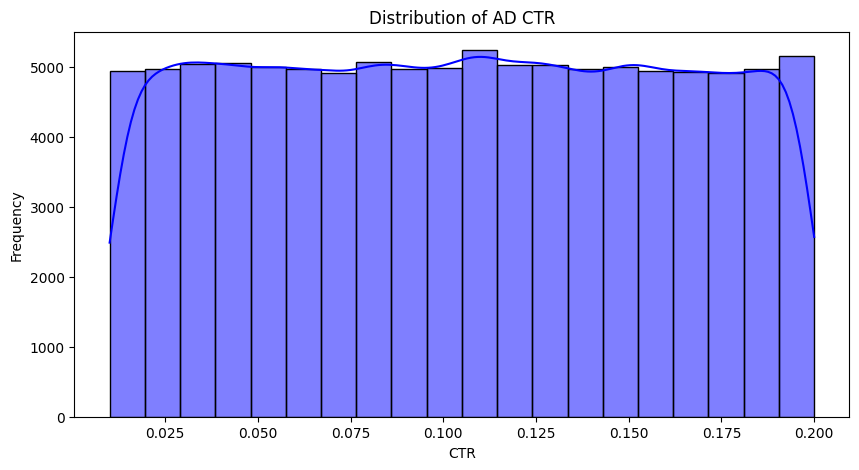

In [ ]:
# ads vs Revenue
plt.figure(figsize = (8,5))
sns.scatterplot(x = df['Ad_Spend'], y = df['Revenue'],color = 'red')
plt.title('Ads vs Revenue')
plt.xlabel('Ad Spend')
plt.ylabel('Revenue')
plt.show()

# ads CTR
plt.figure(figsize = (10,5))
sns.histplot(x = df['Ad_CTR'],color = 'b',bins= 20,kde = True)
plt.title('Distribution of AD CTR')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.show()





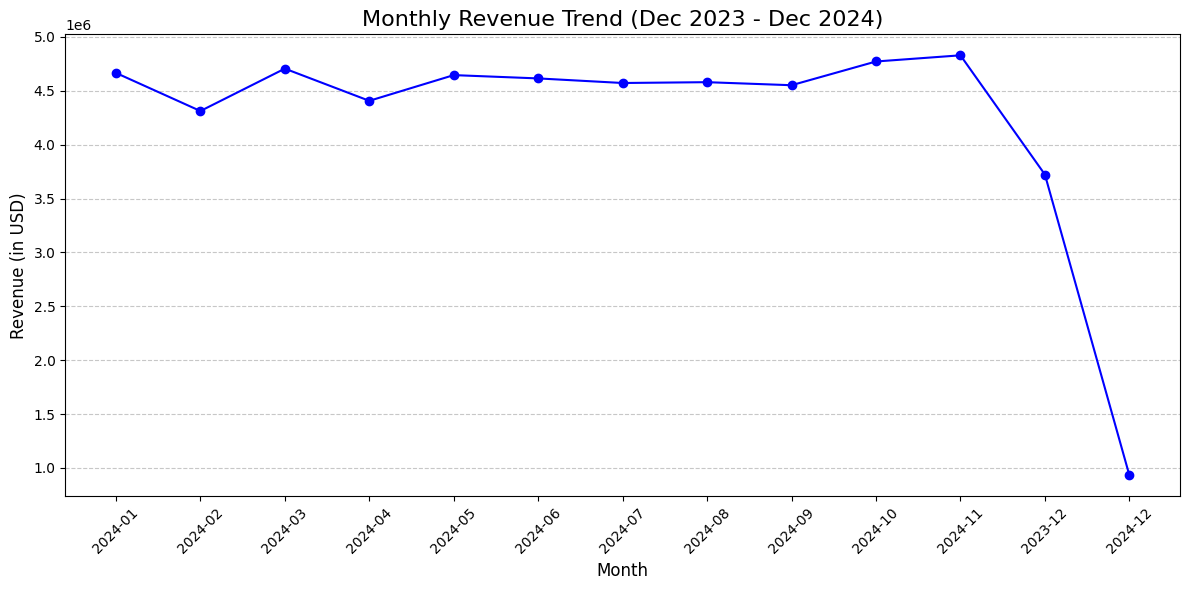

In [ ]:


# Aggregate revenue per month for trend visualization
trend_analysis['Year-Month'] = trend_analysis['Year'].astype(str) + '-' + trend_analysis['Month'].astype(str).str.zfill(2)

# Plotting monthly revenue trends
plt.figure(figsize=(12, 6))
plt.plot(trend_analysis['Year-Month'], trend_analysis['Monthly_Revenue'], marker='o', linestyle='-', color='b')
plt.title('Monthly Revenue Trend (Dec 2023 - Dec 2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


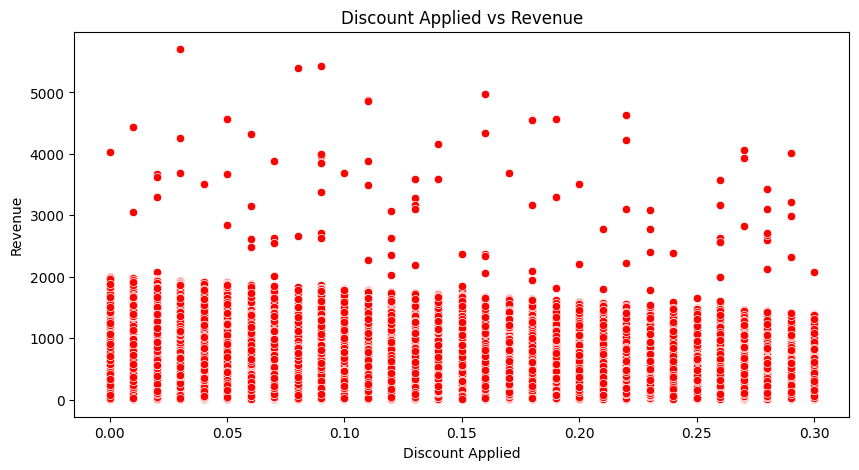

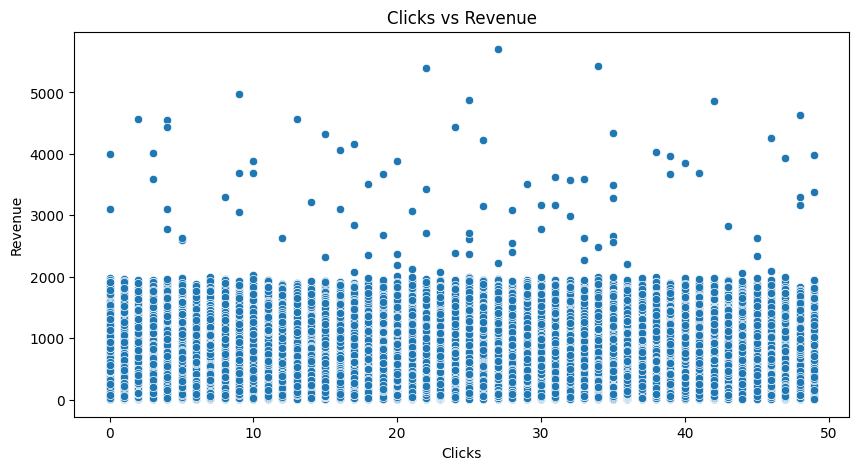

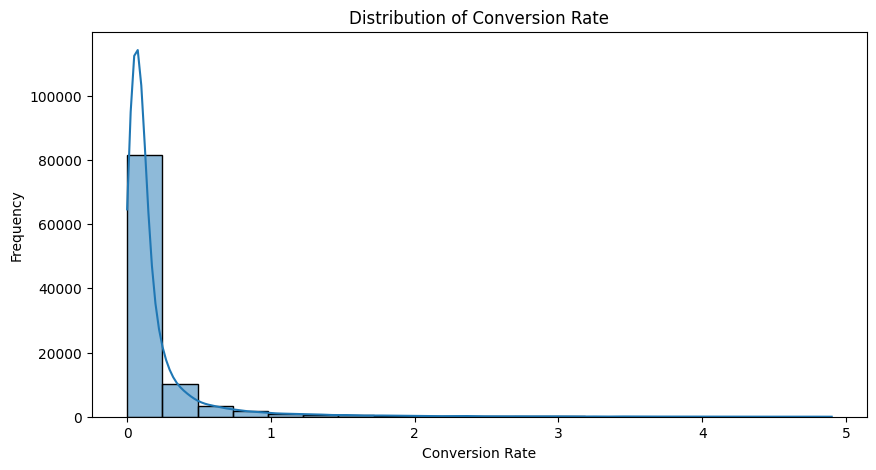

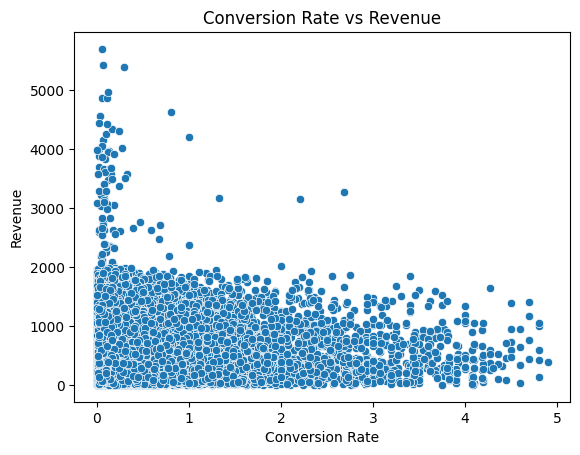

In [ ]:
#effectivness dicount applied of revenue e commerce
plt.figure(figsize=(10,5))
sns.scatterplot(x = df['Discount_Applied'], y = df['Revenue'], color = 'red')
plt.title('Discount Applied vs Revenue')
plt.xlabel('Discount Applied')
plt.ylabel('Revenue')
plt.show()

#click vs revenue
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Clicks'], y=df['Revenue'])
plt.title('Clicks vs Revenue')
plt.xlabel('Clicks')
plt.ylabel('Revenue')
plt.show()

#Conservation Rate analyis
plt.figure(figsize=(10, 5))
sns.histplot(df['Conversion_Rate'], bins=20, kde=True)
plt.title('Distribution of Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.show()

#plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Conversion_Rate'], y=df['Revenue'])
plt.title('Conversion Rate vs Revenue')
plt.xlabel('Conversion Rate')
plt.ylabel('Revenue')
plt.show()



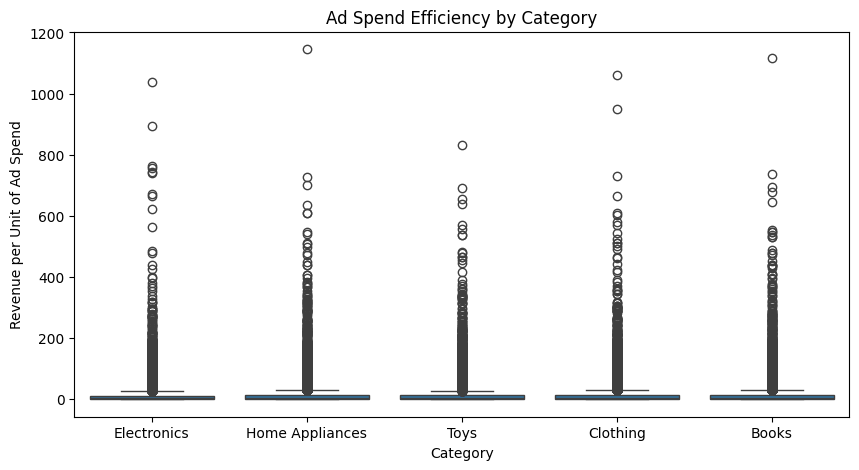

In [ ]:
df['Ad_Efficiency'] = df['Revenue'] / df['Ad_Spend']
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Category', y='Ad_Efficiency')
plt.title('Ad Spend Efficiency by Category')
plt.xlabel('Category')
plt.ylabel('Revenue per Unit of Ad Spend')
plt.show()

In [ ]:
#Get correlation for data set
correlation_matrix = df.select_dtypes(include = np.number)
correlation_matrix.corr()
round(correlation_matrix.corr(),2)


,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend
Units_Sold,1.00,-0.00,0.04,0.00,0.00,0.00,0.00,-0.00,-0.00
Discount_Applied,-0.00,1.00,-0.13,-0.00,-0.00,0.00,-0.00,0.00,0.00
Revenue,0.04,-0.13,1.00,0.01,0.00,-0.00,0.01,0.00,0.01
Clicks,0.00,-0.00,0.01,1.00,0.00,0.32,0.00,-0.01,-0.00
Impressions,0.00,-0.00,0.00,0.00,1.00,-0.51,-0.00,0.01,0.00
Conversion_Rate,0.00,0.00,-0.00,0.32,-0.51,1.00,0.00,-0.01,-0.00
Ad_CTR,0.00,-0.00,0.01,0.00,-0.00,0.00,1.00,0.00,0.67
Ad_CPC,-0.00,0.00,0.00,-0.01,0.01,-0.01,0.00,1.00,0.66
Ad_Spend,-0.00,0.00,0.01,-0.00,0.00,-0.00,0.67,0.66,1.00


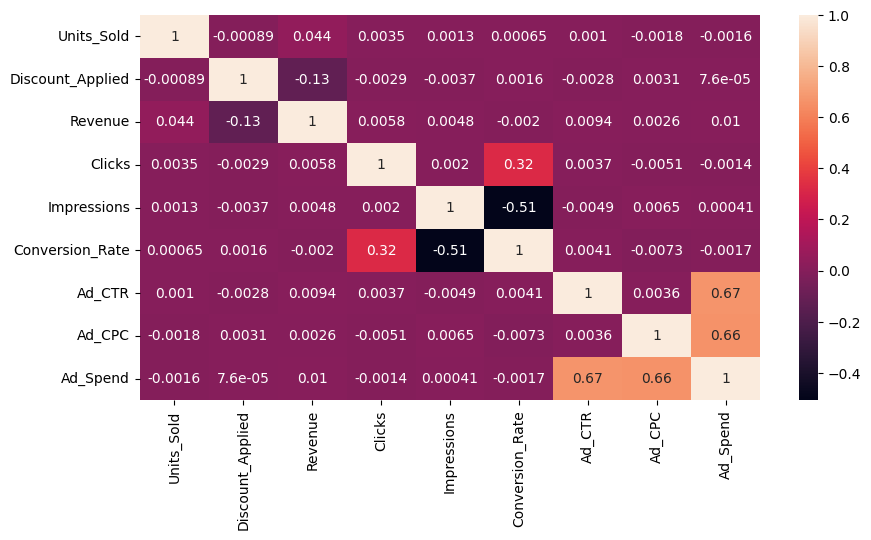

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(correlation_matrix.corr(), annot = True)
plt.show()

In [ ]:
#Explore Data Analyis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    100000 non-null  object        
 1   Customer_ID       100000 non-null  object        
 2   Product_ID        100000 non-null  object        
 3   Transaction_Date  100000 non-null  datetime64[ns]
 4   Units_Sold        100000 non-null  int64         
 5   Discount_Applied  100000 non-null  float64       
 6   Revenue           100000 non-null  float64       
 7   Clicks            100000 non-null  int64         
 8   Impressions       100000 non-null  int64         
 9   Conversion_Rate   100000 non-null  float64       
 10  Category          100000 non-null  object        
 11  Region            100000 non-null  object        
 12  Ad_CTR            100000 non-null  float64       
 13  Ad_CPC            100000 non-null  float64       
 14  Ad_Sp

In [ ]:
#group data by type own
numerics = df.select_dtypes(['int64','float64']).columns
categorical = df.select_dtypes('object').columns

# UNIVARIAT ANALYSIS

In [ ]:
#NUMERICS DATA SET
df[numerics].describe()

,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend,Ad_Efficiency
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,128.328580,0.149871,553.110811,24.539170,254.539060,0.198138,0.104988,1.051250,110.477240,13.661150
std,49.679873,0.086692,428.366294,14.412477,141.466606,0.361187,0.054806,0.549252,87.015846,31.564643
min,51.000000,0.000000,7.650000,0.000000,10.000000,0.000000,0.010000,0.100000,1.050000,0.024972
25%,84.000000,0.070000,221.260000,12.000000,132.000000,0.050000,0.057500,0.580000,38.610000,2.075329
50%,127.000000,0.150000,428.155000,25.000000,254.000000,0.100000,0.105200,1.050000,87.240000,5.081852
75%,166.000000,0.220000,805.865000,37.000000,377.000000,0.190000,0.152300,1.530000,164.220000,12.756096
max,716.000000,0.300000,5704.180000,49.000000,499.000000,4.900000,0.200000,2.000000,399.600000,1145.074324


In [ ]:
df[categorical].describe()

,Transaction_ID,Customer_ID,Product_ID,Category,Region
count,100000,100000,100000,100000,100000
unique,100000,19865,1000,5,3
top,8b460852-7c64-46fa-998b-b0976879d082,Customer_16743,Product_568,Electronics,Asia
freq,1,18,137,21533,33472


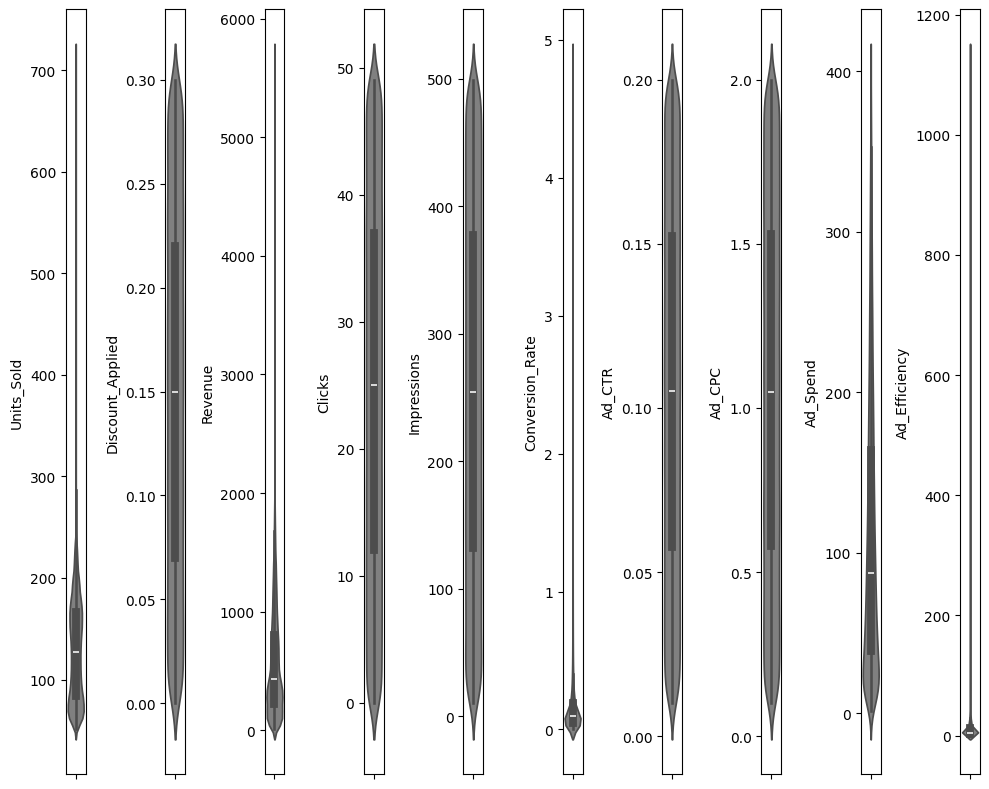

In [ ]:
#univariat analysis
plt.figure(figsize = (10,8))
for i in range(0, len(numerics)):
  plt.subplot(1, len(numerics), i+1)
  sns.violinplot(y=df[numerics[i]],color = 'grey',orient = 'v')
  plt.tight_layout()

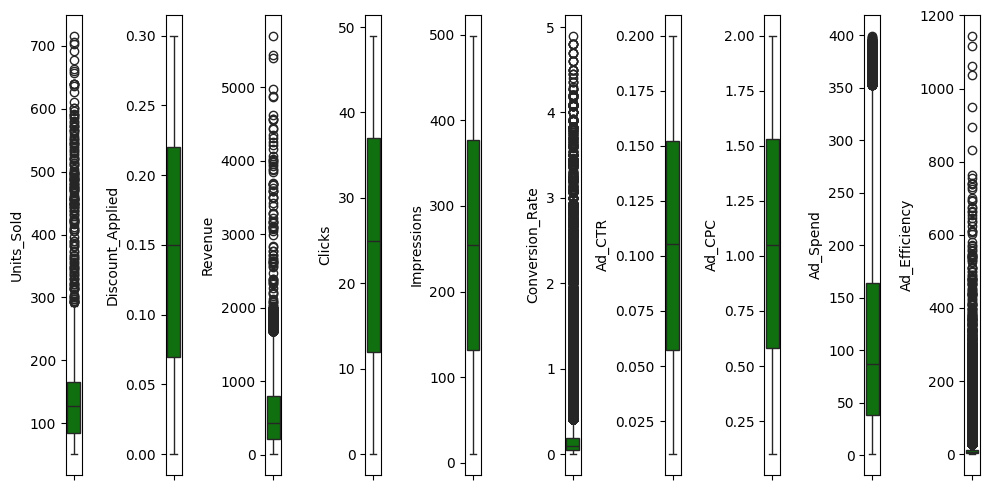

In [ ]:
plt.figure(figsize = (10,5))
for i in range(0, len(numerics)):
  plt.subplot(1, len(numerics), i+1)
  sns.boxplot(y=df[numerics[i]],color = 'green',orient = 'v')
  plt.tight_layout()

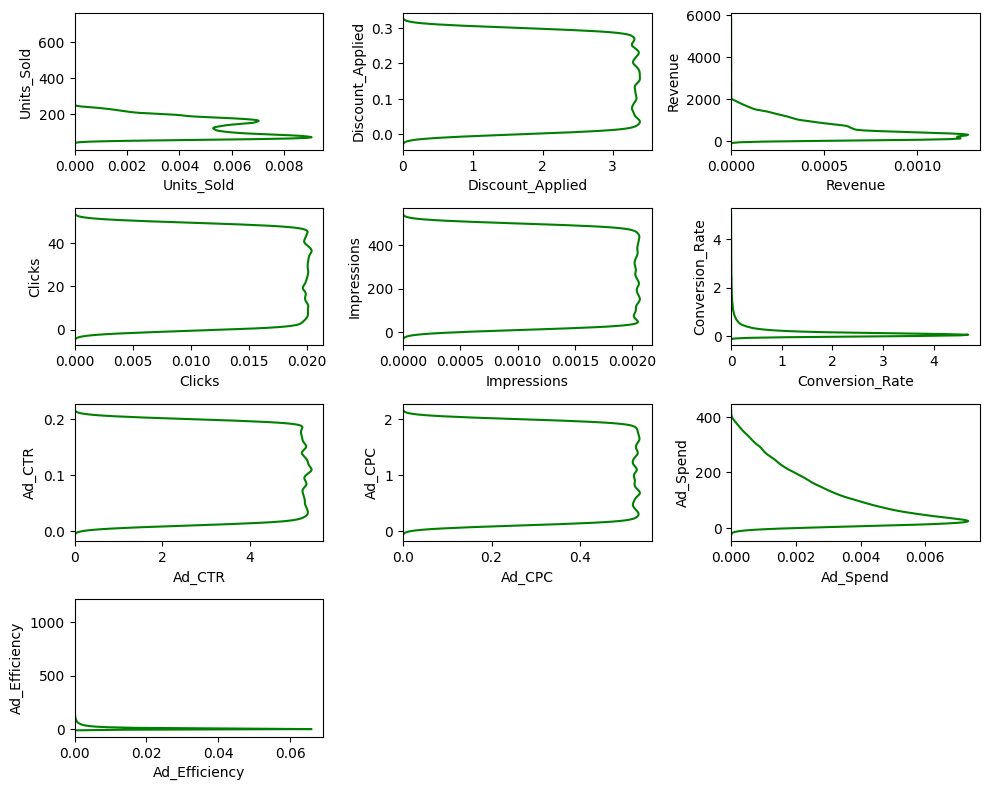

In [ ]:
plt.figure(figsize = (10,8))
num_cols = 3  # Number of columns in the subplot grid
num_rows = int(np.ceil(len(numerics) / num_cols))  # Calculate number of rows needed

for i in range(0, len(numerics)):
  plt.subplot(num_rows, num_cols, i+1)  # Create subplot with dynamic grid
  sns.kdeplot(y=df[numerics[i]],color = 'green')
  plt.xlabel(numerics[i])
  plt.tight_layout()

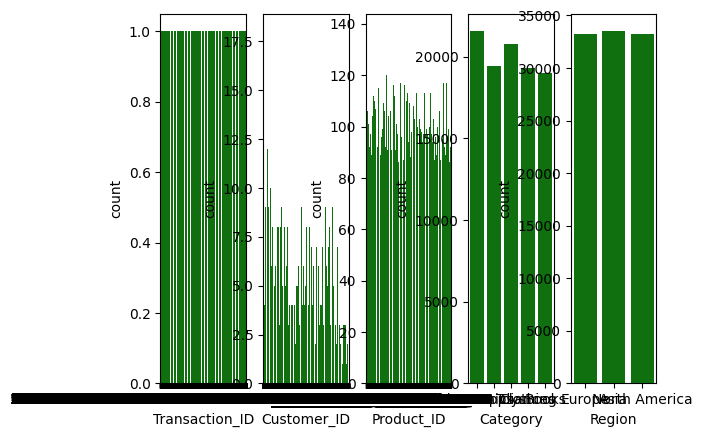

In [ ]:
#CATEGORICAL DATASET
plt.figure(figsize = (10,8))
for i in range(0,len(categorical)):
  plt.subplot(1, len(categorical), i+1)
  sns.countplot(x=df[categorical[i]],color = 'green')
  plt.tight_layout()

In [3]:
#machine learning prediction Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df[['Units_Sold', 'Discount_Applied', 'Clicks', 'Impressions', 'Conversion_Rate', 'Ad_CTR', 'Ad_CPC', 'Ad_Spend']]
y = df['Revenue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [4]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
mse, r2

(179409.00760308368, 0.017316840617742746)

In this notebook, we explored a synthetic e-commerce dataset, performed exploratory data analysis, and built a simple linear regression model to predict revenue. The model's performance can be improved by exploring more complex algorithms, feature engineering, and hyperparameter tuning. Future work could also include time series analysis to forecast future sales trends based on historical data.

In [ ]:
|